In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


## Importing

In [2]:
import time
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.cluster import SpectralClustering


from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

# datasets

In [3]:
random_state = 42
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
no_structure = np.random.rand(n_samples, 2)

# Anisotropicly distributed data
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

## plt.figure

In [4]:

# plt.figure(figsize=(9 * 2 + 3, 13))
# # plt.subplots_adjust(
# #     left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
# # )
# plot_num = 1

## default_base

In [5]:
# default_base = {
#     "quantile": 0.3,"eps": 0.3,"damping": 0.9,
#     "preference": -200,"n_neighbors": 3,"n_clusters": 3,
#     "min_samples": 7,"xi": 0.05,"min_cluster_size": 0.1,
# }

## def make_plots

In [6]:
def make_plots(data, param_grid):
  X, y = data

  # normalize dataset
  X = StandardScaler().fit_transform(X)

  # estimate bandwidth for mean shift
  bandwidth = cluster.estimate_bandwidth(X, quantile=param_grid["quantile"])
  connectivity = kneighbors_graph(X, n_neighbors=param_grid["n_neighbors"], include_self=False)

  # make connectivity symmetric
  connectivity = 0.5 * (connectivity + connectivity.T)

  #assiging models
  kmeans = cluster.MiniBatchKMeans(n_clusters=param_grid["n_clusters"])
  spectral = cluster.SpectralClustering(n_clusters=param_grid["n_clusters"],
        eigen_solver="arpack",affinity="nearest_neighbors")
  average_linkage = cluster.AgglomerativeClustering(linkage="average",affinity="cityblock",
          n_clusters=param_grid["n_clusters"],connectivity=connectivity)
  ward = cluster.AgglomerativeClustering(n_clusters=param_grid["n_clusters"], linkage="ward", connectivity=connectivity)
  birch = cluster.Birch(n_clusters=param_grid["n_clusters"])
  gmm = mixture.GaussianMixture(n_components=param_grid["n_clusters"], covariance_type="full")
  
  # list of tuples (name, model)
  cluster_algos = [('kmeans',kmeans), ('spectral',spectral), ('avg_linkage',average_linkage),
                   ('ward',ward), ('birch',birch), ('gmm',gmm)]
  
  # plotting
  fig,ax = plt.subplots(2,3, figsize=(18,8))
  for i, (name,algo) in enumerate(cluster_algos):
    algo.fit(X)
    if hasattr(algo, "labels_"):
        y_pred = algo.labels_.astype(int)
    else:
        y_pred = algo.predict(X)
    colors = np.array(list(islice(cycle(["#14536C","#76C468","#D8822F",
                    "#F9ED5F","#1DB6AF","#D1AE20",
                    "#6B493B","#DE8A16","#2C3829",]),int(max(y_pred) + 1),)))
    colors = np.append(colors, ["#000000"])
    if i <=2:
      ax[0][i].scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
      ax[0][i].set_title(name, fontsize=14, fontweight='bold')
    elif i >2:
      ax[1][i-3].scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
      ax[1][i-3].set_title(name, fontsize=14, fontweight='bold')
  plt.savefig('fig.png')
  plt.show()

# n_clusters

In [7]:
n_clusters = 2

# noisy_circles

In [8]:
params_noisy_circles = {"damping": 0.77,"preference": -240,
            "quantile": 0.2,"n_clusters": n_clusters,
            "min_samples": 7,"xi": 0.08, 'n_neighbors':2}
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.08)

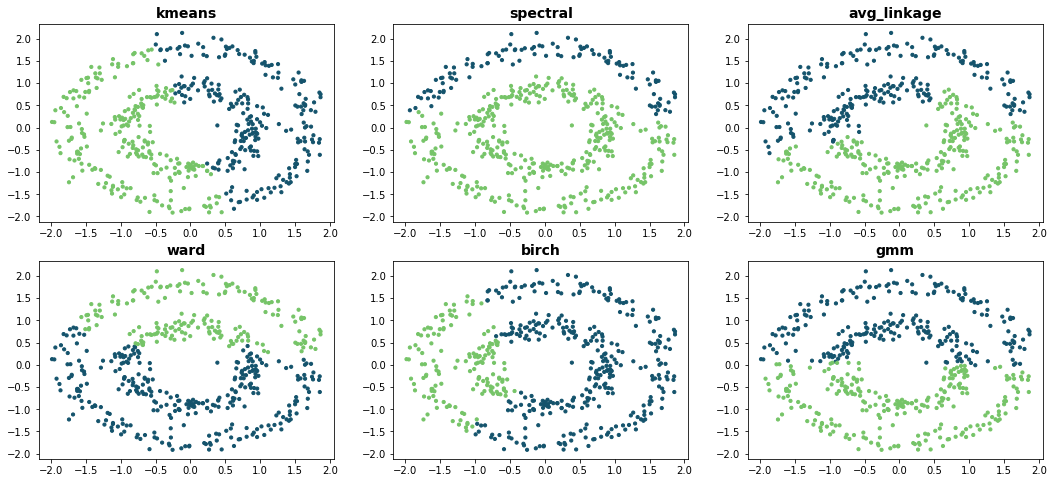

In [9]:
make_plots(noisy_circles, params_noisy_circles)

# noisy_moons

In [10]:
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
params_noisy_moons = {"damping": 0.75,"preference": -220,
            "n_clusters": n_clusters,"min_samples": 7,"quantile": 0.2,
            "xi": 0.1, 'n_neighbors':5}

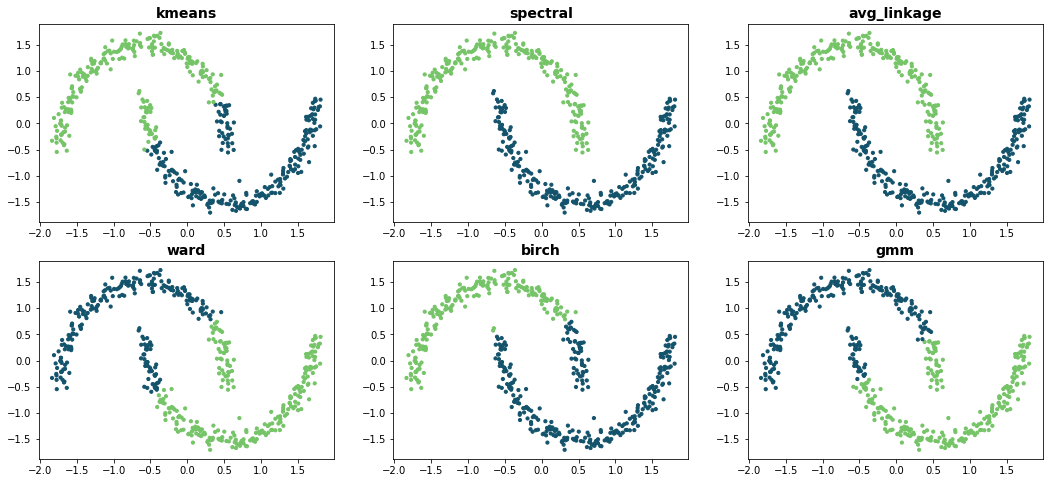

In [11]:
make_plots(noisy_moons, params_noisy_moons)

# blobs

In [12]:
blobs = datasets.make_blobs(n_samples=n_samples, random_state=42)
params_blob = {"min_samples": 7, "xi": 0.1,"min_cluster_size": 0.2,
               "quantile": 0.2,'n_neighbors':2,"n_clusters": n_clusters}

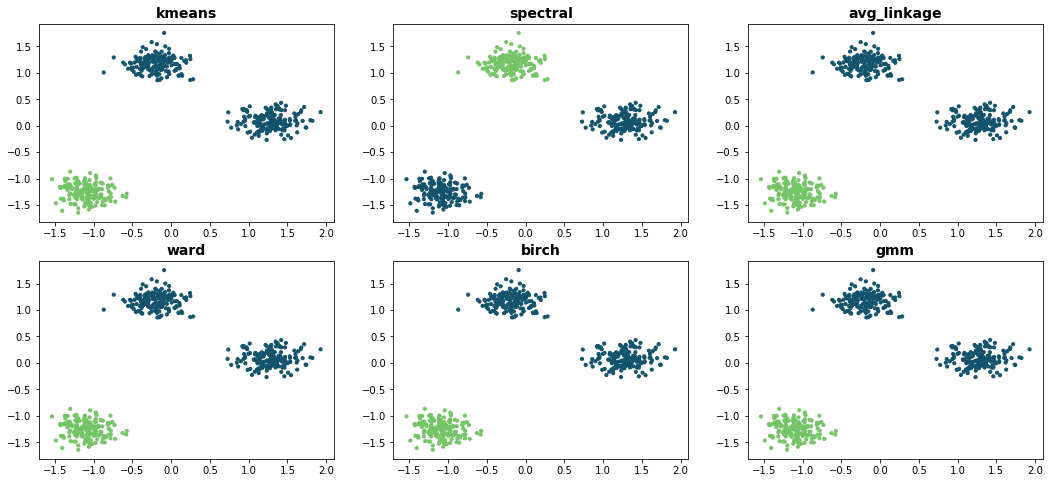

In [13]:
make_plots(blobs, params_blob)

# varied

In [14]:
varied = datasets.make_blobs(    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
params_varied = {"eps": 0.18,"n_neighbors": 2,
            "min_samples": 7,"xi": 0.01,"min_cluster_size": 0.2,
            "quantile": 0.2,'n_neighbors':2,"n_clusters": n_clusters}

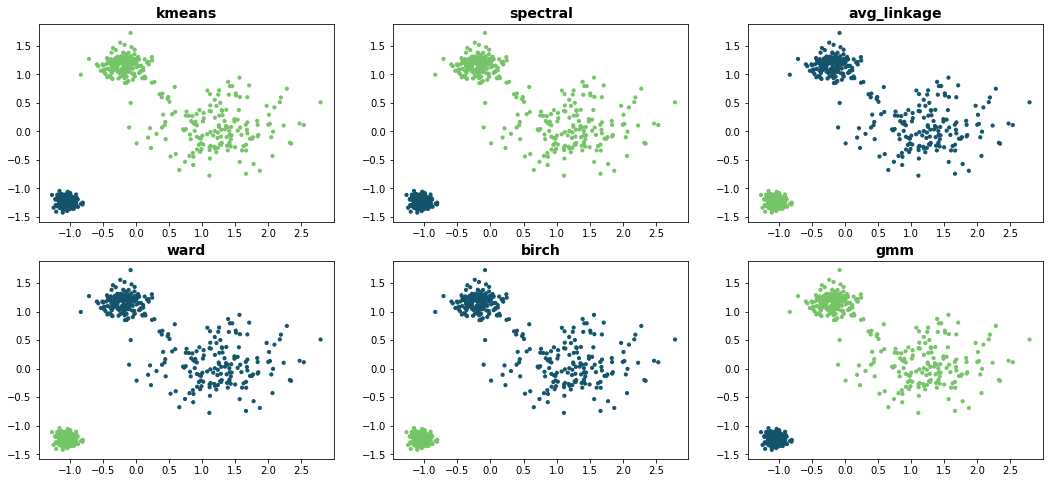

In [15]:
make_plots(varied, params_varied)

# aniso (unequal)

In [16]:
random_state = 42
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
params_ansio = {"eps": 0.15,"n_neighbors": 2,
            "min_samples": 7,"xi": 0.1,"min_cluster_size": 0.2,
            "quantile": 0.2,'n_neighbors':2,"n_clusters": n_clusters}


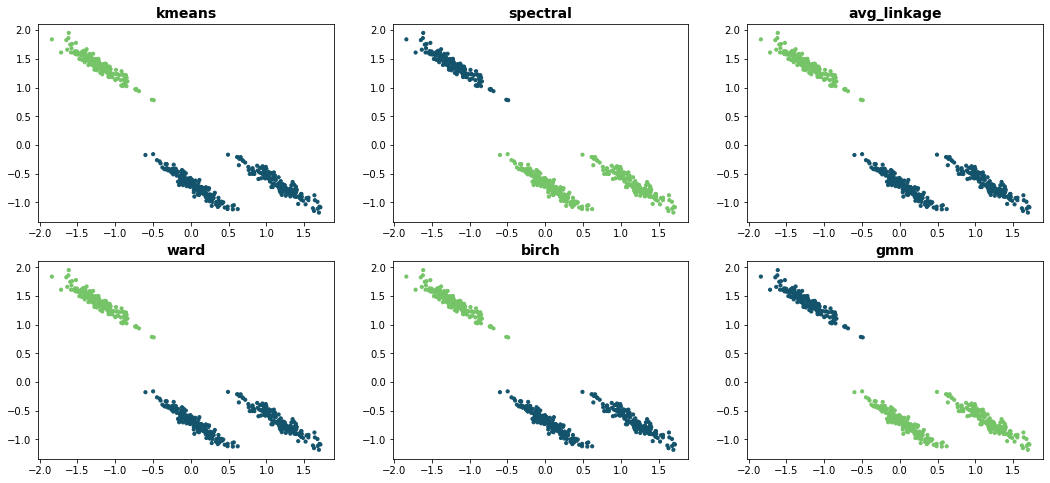

In [17]:
make_plots(aniso, params_ansio)